In [1]:
from pathlib import Path
from configuration import config

stage_yaml_file_name = 'stage.yaml'
stage_yaml_file_path = Path.cwd() / stage_yaml_file_name

In [2]:
cd ../qcore

C:\Users\qcrew\Desktop\qcrew\qcore


In [3]:
import matplotlib.pyplot as plt

from qm.QuantumMachinesManager import QuantumMachinesManager
from qm.QuantumMachine import QuantumMachine
from qm.qua import *

from instruments import LabBrick, Sa124, Stage

## Instrument staging

In [4]:
# Staging
stage = Stage.load(stage_yaml_file_path)

device = stage.device_A
qubit = stage.device_A.qubit
rr = stage.device_A.rr
lb_qubit = stage.lb_qubit
lb_rr = stage.lb_rr
sa = stage.sa

# start the qm
qmm = QuantumMachinesManager()
qm = qmm.open_qm(config)

Trying to initialize lb_qubit
Connnected to LabBrick 25331
Setting initial parameters...
Successfully set frequency to 4.1650000E+09
Successfully set power to +15
LabBrick is ready to use.
Trying to initialize lb_rr
Connnected to LabBrick 25335
Setting initial parameters...
Successfully set frequency to 8.7571000E+09
Successfully set power to +13
LabBrick is ready to use.
Trying to initialize sa, will take about 5s...
Connnected to SA124B 19184645
Configured sweep! Sweep info: 
{'start': '7.7501000E+09', 'center': '8.0000000E+09', 'span': '5.000E+08', 'sweep_length': 2500, 'rbw': '2.500E+05', 'ref_power': 0, 'bin_size': '2.000E+05'}
2021-05-03 16:37:47,607 - qm - INFO - Performing health check
2021-05-03 16:37:47,615 - qm - INFO - Health check passed


## Get coarse sweep prior to tuning

In [5]:
with program() as qua_program:
    with infinite_loop_():
        play('CW', 'qubit')
job = qm.execute(qua_program)

2021-05-03 16:37:47,681 - qm - INFO - Flags: 
2021-05-03 16:37:47,681 - qm - INFO - Executing high level program


Configured sweep! Sweep info: 
{'start': '4.0401000E+09', 'center': '4.1650000E+09', 'span': '2.500E+08', 'sweep_length': 1250, 'rbw': '2.500E+05', 'ref_power': 0, 'bin_size': '2.000E+05'}


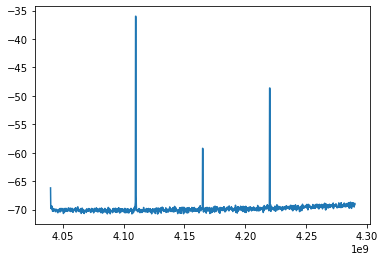

In [6]:
freqs, amps = sa.sweep(center=qubit.lo_freq, span=250e6)
plt.plot(freqs, amps)

## Watch the new improved MixerTuner in action!!!

In [7]:
from instruments.meta.mixer_tuner import MixerTuner
import time

In [8]:
# initialise mixer tuner with sa and qm
mixer_tuner = MixerTuner(sa=sa, qm=qm)

In [9]:
start_time = time.perf_counter()

2021-05-03 16:37:51,831 - qm - INFO - Flags: 
2021-05-03 16:37:51,831 - qm - INFO - Executing high level program
Coarse sweep before tuning qubit mixer...
Configured sweep! Sweep info: 
{'start': '4.0551000E+09', 'center': '4.1650000E+09', 'span': '2.200E+08', 'sweep_length': 1100, 'rbw': '2.500E+05', 'ref_power': 0, 'bin_size': '2.000E+05'}


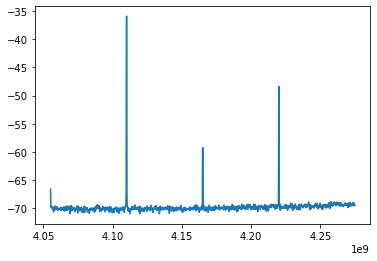

Sweep took 2.6477s

Zooming in to qubit LO leakage...
Configured sweep! Sweep info: 
{'start': '4.1629000E+09', 'center': '4.1650000E+09', 'span': '4.165E+06', 'sweep_length': 273, 'rbw': '5.000E+04', 'ref_power': 0, 'bin_size': '1.538E+04'}


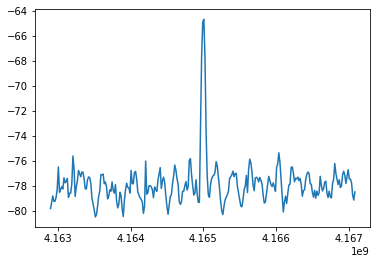

Sweep took 0.92642s

Floor (~mean): -77.872dB, stdev: 1.7712dB
amp: -64.68dB, contrast: 13.191dB

Performing minimization...
method: Nelder-Mead, init_simplex: [[0.  0. ]
 [0.  0.1]
 [0.1 0. ]], xatol: 0.0001, fatol: 1, max_iter: 100
I: 0.0, Q: 0.0, contrast: 13.158
I: 0.0, Q: 0.1, contrast: 33.547
I: 0.1, Q: 0.0, contrast: 33.052
I: 0.1, Q: -0.1, contrast: 35.586
I: 0.025, Q: 0.05, contrast: 29.16
I: -0.075, Q: 0.05, contrast: 32.466
I: -0.03125, Q: 0.0375, contrast: 27.752
I: -0.05625, Q: -0.0125, contrast: 27.374
I: -0.025, Q: -0.05, contrast: 25.879
I: 0.03125, Q: -0.0375, contrast: 25.803
I: 0.05625, Q: 0.0125, contrast: 28.668
I: -0.0046875, Q: -0.034375, contrast: 20.396
I: -0.035937, Q: 0.003125, contrast: 24.077
I: -0.019141, Q: -0.0070312, contrast: 17.302
I: -0.014453, Q: 0.027344, contrast: 24.793
I: -0.0071289, Q: -0.018945, contrast: 12.583
I: 0.012012, Q: -0.011914, contrast: 16.324
I: 0.0042236, Q: -0.010693, contrast: 9.4557
I: -0.0029053, Q: -0.029639, contrast: 18.43

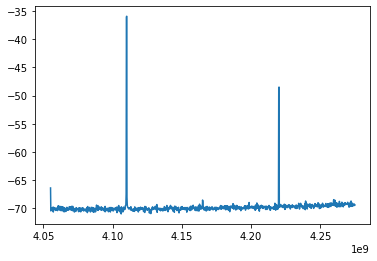

Sweep took 2.4744s

Zooming in to qubit SB leakage...
Configured sweep! Sweep info: 
{'start': '4.2178692E+09', 'center': '4.2200000E+09', 'span': '4.220E+06', 'sweep_length': 276, 'rbw': '5.000E+04', 'ref_power': 0, 'bin_size': '1.538E+04'}


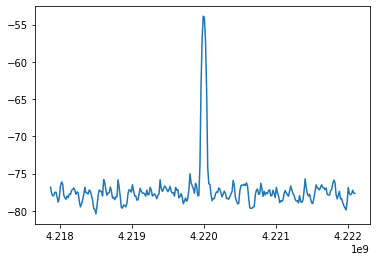

Sweep took 0.91226s

Floor (~mean): -77.276dB, stdev: 3.0674dB
amp: -54.024dB, contrast: 23.252dB

Performing minimization...
method: Nelder-Mead, init_simplex: [[0.  0. ]
 [0.  0.1]
 [0.1 0. ]], xatol: 0.0001, fatol: 1, max_iter: 100
G: 0.0, P: 0.0, contrast: 23.361
G: 0.0, P: 0.1, contrast: 21.939
G: 0.1, P: 0.0, contrast: 26.387
G: -0.1, P: 0.1, contrast: 15.121
G: -0.2, P: 0.15, contrast: 8.5432
G: -0.2, P: 0.25, contrast: 20.364
G: -0.4, P: 0.3, contrast: 28.668
G: -0.1, P: 0.15, contrast: 16.057
G: -0.1, P: 0.05, contrast: 17.373
G: -0.125, P: 0.1, contrast: 12.439
G: -0.225, P: 0.1, contrast: 9.3587
G: -0.3, P: 0.15, contrast: 19.223
G: -0.16875, P: 0.1125, contrast: 3.1296
G: -0.14375, P: 0.1625, contrast: 12.612
G: -0.20469, P: 0.11563, contrast: 5.5651
G: -0.17344, P: 0.078125, contrast: 9.6923
G: -0.19336, P: 0.13203, contrast: 3.3159
G: -0.15742, P: 0.12891, contrast: 6.018
G: -0.19287, P: 0.11895, contrast: 0.97135
G: -0.16826, P: 0.099414, contrast: 4.855
G: -0.18708, P: 

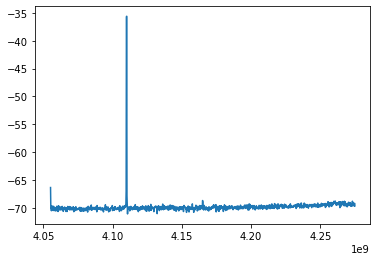

Sweep took 2.4748s

2021-05-03 16:38:13,897 - qm - INFO - Flags: 
2021-05-03 16:38:13,898 - qm - INFO - Executing high level program
Coarse sweep before tuning rr mixer...
Configured sweep! Sweep info: 
{'start': '8.6621000E+09', 'center': '8.7571000E+09', 'span': '1.900E+08', 'sweep_length': 950, 'rbw': '2.500E+05', 'ref_power': 0, 'bin_size': '2.000E+05'}


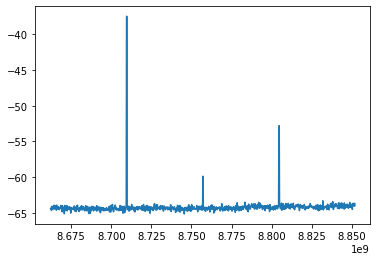

Sweep took 2.2535s

Zooming in to rr LO leakage...
Configured sweep! Sweep info: 
{'start': '8.7527000E+09', 'center': '8.7571000E+09', 'span': '8.757E+06', 'sweep_length': 571, 'rbw': '5.000E+04', 'ref_power': 0, 'bin_size': '1.538E+04'}


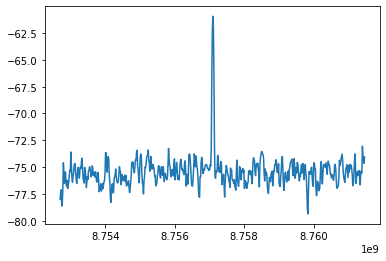

Sweep took 0.94964s

Floor (~mean): -75.466dB, stdev: 1.4832dB
amp: -60.925dB, contrast: 14.541dB

Performing minimization...
method: Nelder-Mead, init_simplex: [[0.  0. ]
 [0.  0.1]
 [0.1 0. ]], xatol: 0.0001, fatol: 1, max_iter: 100
I: 0.0, Q: 0.0, contrast: 13.679
I: 0.0, Q: 0.1, contrast: 35.138
I: 0.1, Q: 0.0, contrast: 34.297
I: 0.1, Q: -0.1, contrast: 36.275
I: 0.025, Q: 0.05, contrast: 30.723
I: -0.075, Q: 0.05, contrast: 33.931
I: -0.03125, Q: 0.0375, contrast: 29.316
I: -0.05625, Q: -0.0125, contrast: 30.418
I: -0.035937, Q: 0.003125, contrast: 26.958
I: -0.0046875, Q: -0.034375, contrast: 23.486
I: 0.03125, Q: -0.0375, contrast: 25.669
I: 0.014453, Q: -0.027344, contrast: 20.361
I: 0.019141, Q: 0.0070312, contrast: 21.71
I: 0.013184, Q: -0.0033203, contrast: 14.695
I: -0.0012695, Q: 0.024023, contrast: 24.719
I: 0.010522, Q: -0.014502, contrast: 12.017
I: -0.0026611, Q: -0.011182, contrast: 12.558
I: 0.0078613, Q: -0.025684, contrast: 18.566
I: 0.0019653, Q: -0.0064209, cont

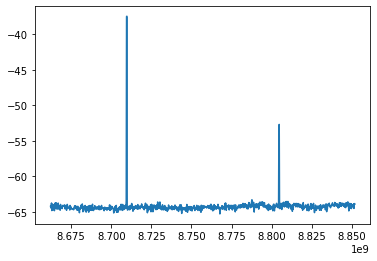

Sweep took 2.0904s

Zooming in to rr SB leakage...
Configured sweep! Sweep info: 
{'start': '8.8001769E+09', 'center': '8.8046000E+09', 'span': '8.805E+06', 'sweep_length': 574, 'rbw': '5.000E+04', 'ref_power': 0, 'bin_size': '1.538E+04'}


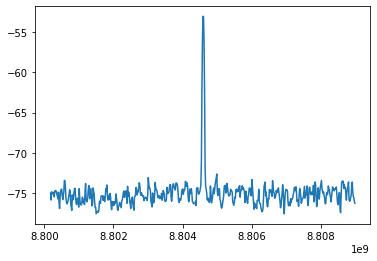

Sweep took 0.96291s

Floor (~mean): -75.065dB, stdev: 2.0898dB
amp: -53.111dB, contrast: 21.954dB

Performing minimization...
method: Nelder-Mead, init_simplex: [[0.  0. ]
 [0.  0.1]
 [0.1 0. ]], xatol: 0.0001, fatol: 1, max_iter: 100
G: 0.0, P: 0.0, contrast: 22.016
G: 0.0, P: 0.1, contrast: 22.685
G: 0.1, P: 0.0, contrast: 25.735
G: -0.1, P: 0.1, contrast: 18.069
G: -0.2, P: 0.15, contrast: 20.579
G: -0.1, P: 0.0, contrast: 14.384
G: -0.15, P: -0.05, contrast: 15.622
G: -0.2, P: 0.1, contrast: 16.435
G: -0.2, P: 0.0, contrast: 9.6901
G: -0.25, P: -0.05, contrast: 18.998
G: -0.1, P: -0.1, contrast: 20.438
G: -0.175, P: 0.05, contrast: 7.3528
G: -0.275, P: 0.05, contrast: 18.855
G: -0.14375, P: 0.0125, contrast: 5.7705
G: -0.11875, P: 0.0625, contrast: 13.846
G: -0.17969, P: 0.015625, contrast: 2.3849
G: -0.14844, P: -0.021875, contrast: 10.833
G: -0.16836, P: 0.032031, contrast: 1.5196
G: -0.2043, P: 0.035156, contrast: 9.9224
G: -0.15889, P: 0.018164, contrast: 1.0596
G: -0.14756, P:

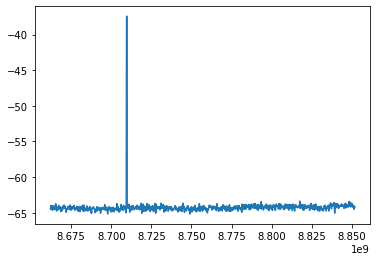

Sweep took 2.099s



In [10]:
# this tunes both the lo and sb of the qubit and the rr
# you can pass tune() with any number of QuantumElement objects
mixer_tuner.tune(qubit, rr)

# this tunes only lo of the given elements
#mixer_tuner.tune_lo(qubit, rr)

# this tunes only sb of the given elements
#mixer_tuner.tune_sb(qubit, rr)

In [11]:
elapsed_time = time.perf_counter() - start_time
print('Tuning took {:.5}s'.format(elapsed_time))

Tuning took 48.522s
